In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

#from tsfresh.feature_selection.relevance import calculate_relevance_table
#from tsfresh import extract_features
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import pairwise_distances
from sklearn.mixture import GaussianMixture

from random import sample

from scipy.spatial import distance
from pycave.bayes import GMM


In [2]:
### For sampled and nonsampled data

non_samped = pd.read_csv('../data/all_non_samped_feats.csv')

samped = pd.read_csv('../data/sampled_feats_for_affinity.csv')

In [3]:
non_samped.max()

ARCH.LM                                       1.0
arch_acf                                      1.0
arch_r2                                       1.0
crossing_points                               1.0
diff1_acf1                                    1.0
                                             ... 
Y__value_count__value_.1                      1.0
Y__value_count__value_0                       1.0
Y__value_count__value_1                       1.0
Y__variance                                   1.0
Y__variance_larger_than_standard_deviation    1.0
Length: 268, dtype: float64

In [2]:
ts = pd.read_csv('../data/feats_scaled.csv')

In [12]:
ts_normed.max()

ARCH.LM                                       1.0
arch_acf                                      1.0
arch_r2                                       1.0
crossing_points                               1.0
diff1_acf1                                    1.0
                                             ... 
Y__value_count__value_.1                      1.0
Y__value_count__value_0                       1.0
Y__value_count__value_1                       1.0
Y__variance                                   1.0
Y__variance_larger_than_standard_deviation    1.0
Length: 268, dtype: float64

In [10]:
ts_normed = pd.read_csv('../data/feats_normed.csv')

In [4]:
ts_unscaled = pd.read_csv('../data/available_feats.csv')

In [54]:
ts_justHyndman = pd.read_csv('Hyndman_Feats_df.csv')

In [4]:
ts_normed.min()

ARCH.LM                                       0.0
arch_acf                                      0.0
arch_r2                                       0.0
crossing_points                               0.0
diff1_acf1                                    0.0
                                             ... 
Y__value_count__value_.1                      0.0
Y__value_count__value_0                       0.0
Y__value_count__value_1                       0.0
Y__variance                                   0.0
Y__variance_larger_than_standard_deviation    0.0
Length: 268, dtype: float64

### Two transformations 
- Minmax: 0 1  
- Standard Scaler: Standardize features by removing the mean and scaling to unit variance

In [3]:
mms = MinMaxScaler()
mms.fit(ts_normed)
data_normed = mms.transform(ts_normed)

In [61]:
data_normed_df = pd.DataFrame(data_normed)

In [63]:
data_normed_df.to_csv('../data/normed_hynd.csv', index=False)

In [45]:
data_scaled = StandardScaler().fit_transform(ts_justHyndman)

### Elbow method scaled data 0 to 30 clusters

In [5]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(ts_normed)
    Sum_of_squared_distances.append(km.inertia_)

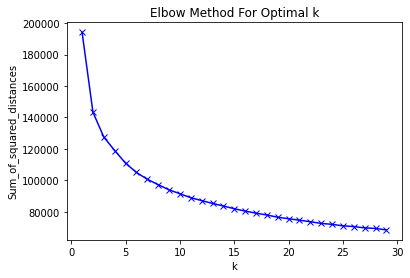

In [6]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Silhouette score for KMeans

In [233]:
n_clusters=np.arange(2, 100)
sils=[]
sils_err=[]
iterations=1
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=KMeans(n, n_init=2).fit(ts_normed) 
        labels=gmm.predict(ts_normed)
        print('gmm')
        sil=silhouette_score(ts_normed, labels, metric='euclidean')
        sils.append(sil)
        print('sil')
    #val=np.mean(SelBest(np.array(tmp_sil), int(iterations/3)))
    #err=np.std(tmp_sil)
   # sils.append(val)
    #sils_err.append(err)
    print(n)

gmm
sil
2
gmm
sil
3
gmm
sil
4
gmm
sil
5
gmm
sil
6
gmm
sil
7
gmm
sil
8
gmm
sil
9
gmm
sil
10
gmm
sil
11
gmm
sil
12
gmm
sil
13
gmm
sil
14
gmm
sil
15
gmm
sil
16
gmm
sil
17
gmm
sil
18
gmm
sil
19
gmm
sil
20
gmm
sil
21
gmm
sil
22
gmm
sil
23
gmm
sil
24
gmm
sil
25
gmm
sil
26
gmm
sil
27
gmm
sil
28
gmm
sil
29
gmm
sil
30
gmm
sil
31
gmm
sil
32
gmm
sil
33
gmm
sil
34
gmm
sil
35
gmm
sil
36
gmm
sil
37
gmm
sil
38
gmm
sil
39
gmm
sil
40
gmm
sil
41
gmm
sil
42
gmm
sil
43
gmm
sil
44
gmm
sil
45
gmm
sil
46
gmm
sil
47
gmm
sil
48
gmm
sil
49
gmm
sil
50
gmm
sil
51
gmm
sil
52
gmm
sil
53
gmm
sil
54
gmm
sil
55
gmm
sil
56
gmm
sil
57
gmm
sil
58
gmm
sil
59
gmm
sil
60
gmm
sil
61
gmm
sil
62
gmm
sil
63
gmm
sil
64
gmm
sil
65
gmm
sil
66
gmm
sil
67
gmm
sil
68
gmm
sil
69
gmm
sil
70
gmm
sil
71
gmm
sil
72
gmm
sil
73
gmm
sil
74
gmm
sil
75
gmm
sil
76
gmm
sil
77
gmm
sil
78
gmm
sil
79
gmm
sil
80
gmm
sil
81
gmm
sil
82
gmm
sil
83
gmm
sil
84
gmm
sil
85
gmm
sil
86
gmm
sil
87
gmm
sil
88
gmm
sil
89
gmm
sil
90
gmm
sil
91
gmm
sil
92
gmm
sil

In [231]:
sils

[0.24572390701140304,
 0.22585455338538155,
 0.20086562505569044,
 0.1485451622768779,
 0.1513255382667147,
 0.14895024866561948,
 0.15338486558223288,
 0.13428023357438293,
 0.1350003889790948,
 0.12649108441045645,
 0.1391189674082935,
 0.12953178543971142,
 0.12263423770125598,
 0.12758780580906878,
 0.13091869874614404,
 0.12377769355941735,
 0.1319695553425621,
 0.1218811859894597,
 0.12062368218116225,
 0.12996616933639746,
 0.11609578498379348,
 0.1300644007405967,
 0.12366545641935835,
 0.1304992871392618,
 0.12648697336974793,
 0.12598605398324977,
 0.13004584672990188,
 0.12843494142488,
 0.12468955441372248,
 0.13013141836617945,
 0.12319220393755875,
 0.1272520134316443,
 0.12654018556123614,
 0.12747075559586038,
 0.12990079942459043,
 0.13128391856756955,
 0.12678899336416924,
 0.12748778779126044,
 0.12818707473831398]

Text(0, 0.5, 'Score')

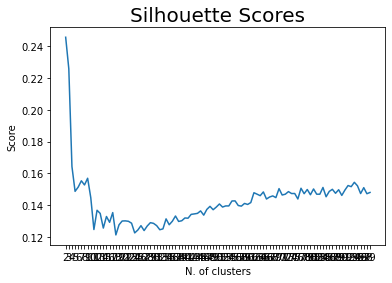

In [234]:
plt.plot(n_clusters, sils)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

C:\Users\lukas\anaconda3\envs\trials_sklearn\lib\site-packages\numpy\core\_asarray.py:102: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Score')

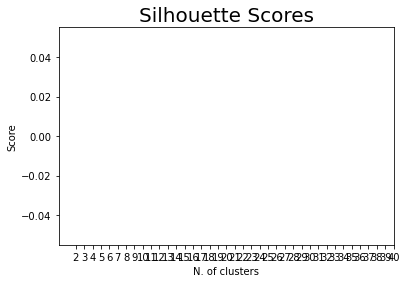

In [225]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

### PCA while keeping 90 % of the variance

In [66]:
data_transf =pd.DataFrame(data_normed)

In [77]:
pca = PCA(.90)
pca.fit(data_normed)
pc_dat = pca.transform(data_normed)
pc_df = pd.DataFrame(pc_dat)

In [78]:
pc_df.to_csv('../data/pc_90_hynd.csv', index=False)

In [68]:
pca.explained_variance_ratio_

array([0.18156231, 0.10296226, 0.09957983, 0.0679963 , 0.04299582,
       0.04078072, 0.03333151, 0.02146857, 0.02115716, 0.01631788,
       0.01605239, 0.01424805, 0.01263105, 0.01158524, 0.01045526,
       0.00924822, 0.00878891, 0.00838702, 0.00763856, 0.00721404,
       0.00719627, 0.00685514, 0.00647572, 0.00632851, 0.00625074,
       0.00606801, 0.00600783, 0.00578496, 0.00565269, 0.00546381,
       0.00541359, 0.00513696, 0.00492732, 0.00473058, 0.00458345,
       0.00454385, 0.00438114, 0.00437174, 0.00412752, 0.00402932,
       0.00398348, 0.00394751, 0.00389463, 0.0038534 , 0.00374253,
       0.00373308, 0.00366813, 0.00360422, 0.00349395, 0.00340389,
       0.00338216, 0.00332753, 0.00325182, 0.00320608, 0.00315022,
       0.00310176, 0.00305832])

### Core Challenge so far: Vast majority is very dense - this is not the case for the Hyndman Features

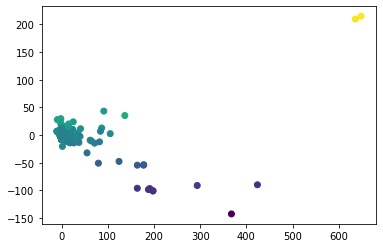

In [53]:
plt.scatter(pc_df.loc[:,0], pc_df.loc[:,1], c=pc_df.loc[:,2])

### Elbow Method PCA 1 to 30 clusters

In [42]:
Sum_of_squared_distances = []
K = range(1,30)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pc_dat)
    Sum_of_squared_distances.append(km.inertia_)

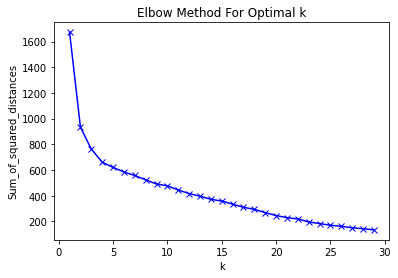

In [43]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Elbow method PCA 1 to 100 Clusters

In [77]:
Sum_of_squared_distances = []
K = range(1,100)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(pc_dat)
    Sum_of_squared_distances.append(km.inertia_)

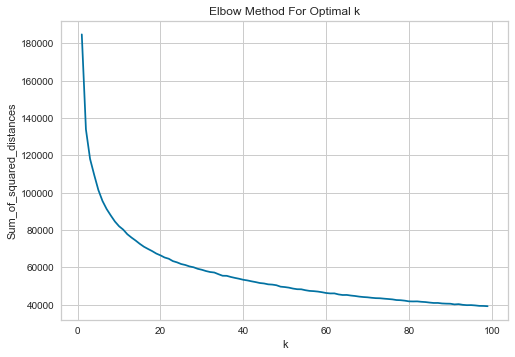

In [78]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

### Running KMeans with a set of different n clusters
Silhouette score works as follows:

For each point p, first find the average distance between p and all other points in the same cluster (this is a measure of cohesion, call it A). Then find the average distance between p and all points in the nearest cluster (this is a measure of separation from the closest other cluster, call it B). The silhouette coefficient for p is defined as the difference between B and A divided by the greater of the two (max(A,B)).

The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. Negative values generally
indicate that a sample has been assigned to the wrong cluster, as a different cluster is more similar.

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=12,
                                      random_state=42))

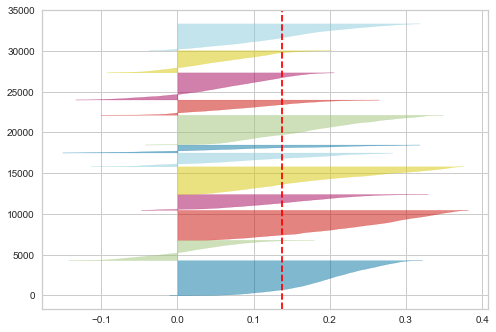

In [13]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=13,
                                      random_state=42))

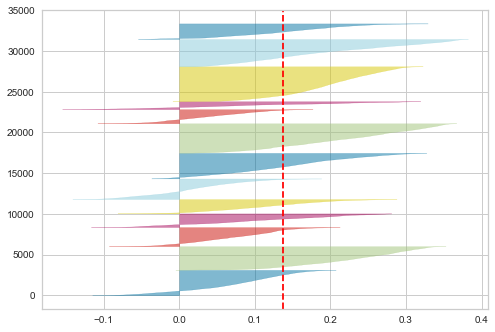

In [14]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=13, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=14,
                                      random_state=410))

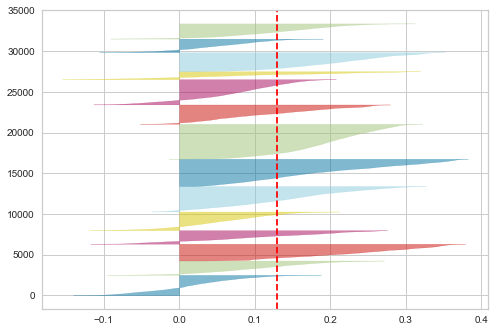

In [15]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=500, random_state=410)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=15,
                                      random_state=42))

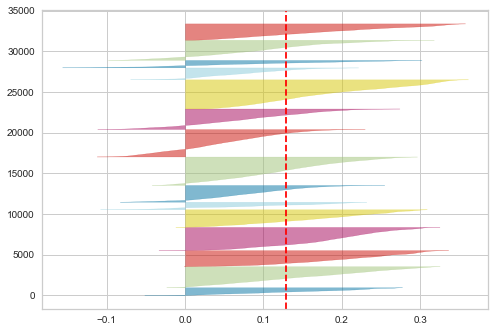

In [16]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=500, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=16,
                                      random_state=42))

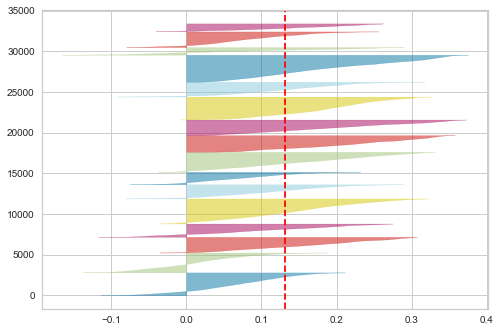

In [17]:
# Silhouette

from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=16, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=17,
                                      random_state=42))

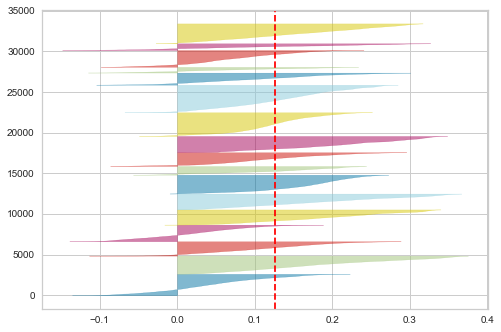

In [18]:
# Silhouette

from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=17, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_normed)

### Running Gaussian Mixture (EM)

In [10]:
ls = [1,2,3,4,5,6,7,8,9,0]


sample(ls,3)

[8, 5, 6]

In [40]:
ts_normed.shape[0]

33265

In [14]:
smp = sample(range(0, ts_normed.shape[0]-1), round(ts_normed.shape[0]/2)) 


In [42]:
first = ts_normed.loc[smp,:]
second = ts_normed.drop(smp, axis=0)
second = second.drop(300, axis=0)

In [46]:
first.shape

(16632, 268)

In [45]:
second.shape

(16632, 268)

In [5]:
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

In [6]:
n_clusters=np.arange(2, 11)
sils=[]
sils_err=[]
iterations=6
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gmm=GaussianMixture(n, n_init=2).fit(ts_normed) 
        labels=gmm.predict(ts_normed)
        print('gmm')
        sil=silhouette_score(ts_normed, labels, metric='euclidean')
        tmp_sil.append(sil)
        print('sil')
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/3)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)
    print(n)

gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
2
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
3
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
4
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
5
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
6
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
7
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
8
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
9
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
gmm
sil
10


In [11]:
gmm=GaussianMixture(15, n_init=2).fit(ts_normed) 
labels=gmm.predict(ts_normed)
print('gmm')
sil=silhouette_score(ts_normed, labels, metric='euclidean')

gmm


0.052228906104486245

Text(0, 0.5, 'Score')

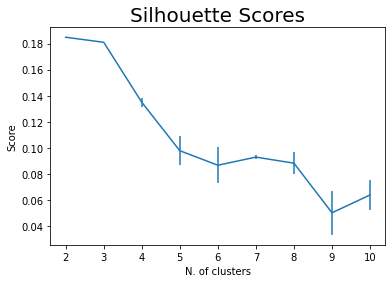

In [10]:
plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

In [9]:
sils

[0.18482947308843284,
 0.18095976333454958,
 0.13502042852925814,
 0.09788749519868802,
 0.08674629140061524,
 0.09298578841015362,
 0.08832008533417103,
 0.05032972744872802,
 0.06396425766335179]

In [8]:
sils_err

[2.7755575615628914e-17,
 0.0,
 0.003534385129227448,
 0.011293546198780553,
 0.013668916117279717,
 0.0014718711815679241,
 0.008378638341339952,
 0.01697533165196921,
 0.01136155451354309]

In [68]:
tmp_sil=[]
for _ in range(10):
    gmm=GaussianMixture(n_components = 9).fit(ts_normed) 
    labels=gmm.predict(ts_normed)
    sil=silhouette_score(ts_normed, labels, metric='euclidean')
    tmp_sil.append(sil)

In [51]:
tmp_sil

[]

In [61]:
gmm=GaussianMixture(2, n_init=2).fit(ts_normed) 
labels=gmm.predict(ts_normed)
sil=silhouette_score(ts_normed, labels, metric='euclidean')

NameError: name 'metrics' is not defined

In [43]:
gmm_a = GaussianMixture(n_components=4)
gmm_a.fit(first)
mod_a = gmm_a.predict(first)


gmm_b = GaussianMixture(n_components=4)
gmm_b.fit(second)
mod_b = gmm_b.predict(second)




In [56]:
gmm_b.

TypeError: score() missing 1 required positional argument: 'X'

In [47]:
def gmm_kl(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)
    log_p_X, _ = gmm_p.score_samples(X)
    log_q_X, _ = gmm_q.score_samples(X)
    return log_p_X.mean() - log_q_X.mean()

In [38]:
# https://stackoverflow.com/questions/26079881/kl-divergence-of-two-gmms

def gmm_js(gmm_p, gmm_q, n_samples=10**5):
    X = gmm_p.sample(n_samples)
    log_p_X, _ = gmm_p.score_samples(X)
    log_q_X, _ = gmm_q.score_samples(X)
    log_mix_X = np.logaddexp(log_p_X, log_q_X)

    Y = gmm_q.sample(n_samples)
    log_p_Y, _ = gmm_p.score_samples(Y)
    log_q_Y, _ = gmm_q.score_samples(Y)
    log_mix_Y = np.logaddexp(log_p_Y, log_q_Y)

    return (log_p_X.mean() - (log_mix_X.mean() - np.log(2))
            + log_q_Y.mean() - (log_mix_Y.mean() - np.log(2))) / 2

In [49]:
def distributions_js(distribution_p, distribution_q, n_samples=10 ** 5):
    # jensen shannon divergence. (Jensen shannon distance is the square root of the divergence)
    # all the logarithms are defined as log2 (because of information entrophy)
    X = distribution_p.rvs(n_samples)
    p_X = distribution_p.pdf(X)
    q_X = distribution_q.pdf(X)
    log_mix_X = np.log2(p_X + q_X)

    Y = distribution_q.rvs(n_samples)
    p_Y = distribution_p.pdf(Y)
    q_Y = distribution_q.pdf(Y)
    log_mix_Y = np.log2(p_Y + q_Y)

    return (np.log2(p_X).mean() - (log_mix_X.mean() - np.log2(2))
            + np.log2(q_Y).mean() - (log_mix_Y.mean() - np.log2(2))) / 2

In [57]:
out = gmm_js(gmm_a, gmm_b)

ValueError: could not broadcast input array from shape (100000,268) into shape (100000)

In [22]:
Sum_of_squared_distances = []
K = range(1,3)
for k in K:
    gmm = GMM(n_components=k)
    gmm.fit(ts_normed)
    km = gmm.predict(data_normed)
    Sum_of_squared_distances.append(km)

In [24]:
Sum_of_squared_distances

[array([0, 0, 0, ..., 0, 0, 0], dtype=int64),
 array([1, 1, 1, ..., 0, 0, 0], dtype=int64)]

In [7]:
n_components = np.arange(1, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_normed)
          for n in n_components]

In [9]:
models

IndexError: list index out of range

In [ ]:
n_components = np.arange(1, 1)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(data_normed)
          for n in n_components]

plt.plot(n_components, [m.bic(Xmoon) for m in models], label='BIC')
plt.plot(n_components, [m.aic(Xmoon) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components');

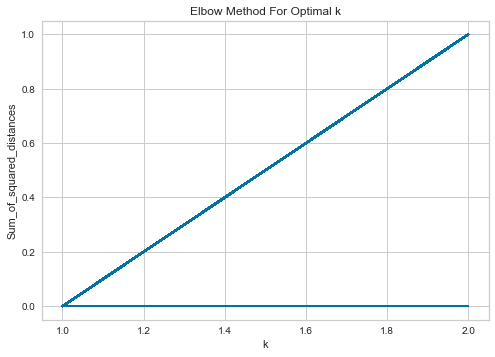

In [23]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=16,
                                      random_state=42))

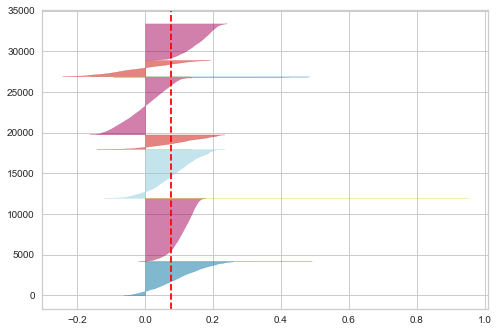

In [67]:
# Silhouette

from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=16, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=26,
                                      random_state=42))

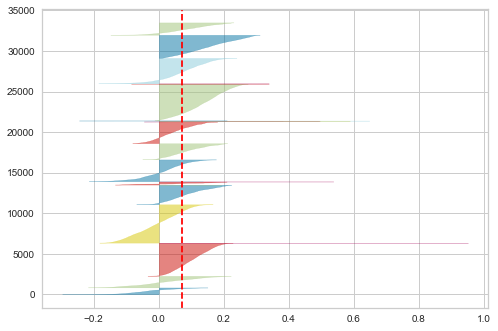

In [68]:
# Silhouette

from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=26, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=14,
                                      random_state=42))

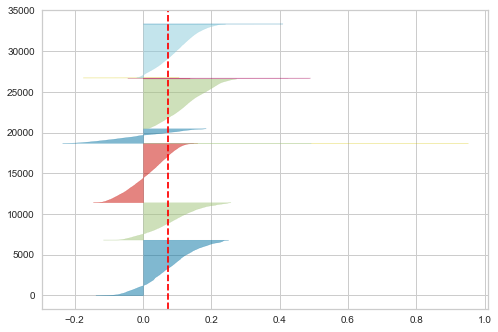

In [69]:
# Silhouette

from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=14, init='k-means++', n_init=10, max_iter=500, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_scaled)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=15,
                                      random_state=42))

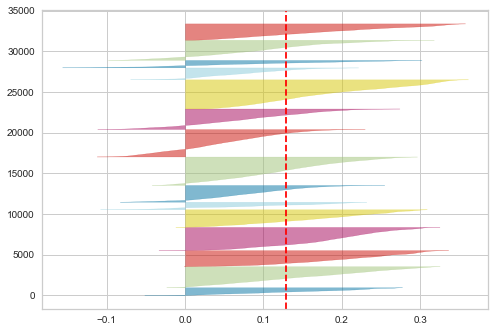

In [32]:
km = KMeans(n_clusters=15, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_transformed)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=20,
                                      random_state=42))

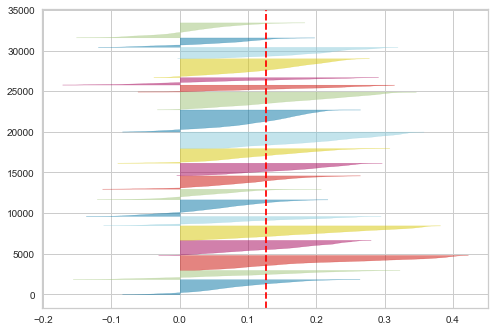

In [33]:
km = KMeans(n_clusters=20, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_transformed)

### Plotting Silhouette with Principal Component Data

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=1000, n_clusters=10,
                                      random_state=42))

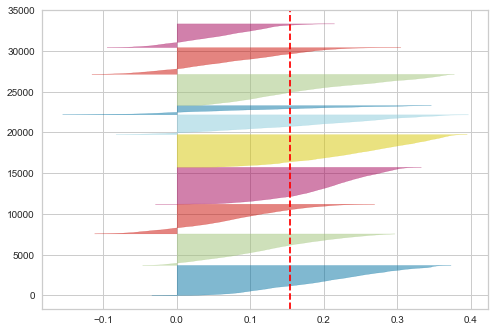

In [85]:
km = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=1000, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=20,
                                      random_state=42))

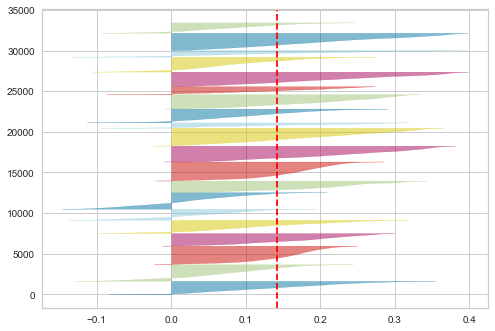

In [79]:
km = KMeans(n_clusters=20, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=35,
                                      random_state=42))

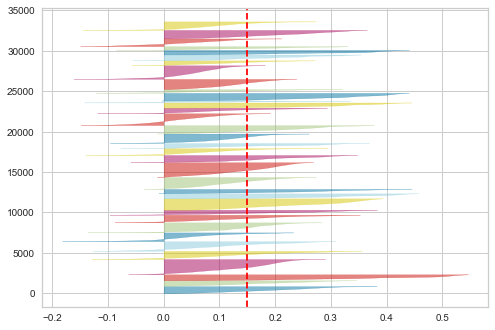

In [80]:
km = KMeans(n_clusters=35, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=100, n_clusters=50,
                                      random_state=42))

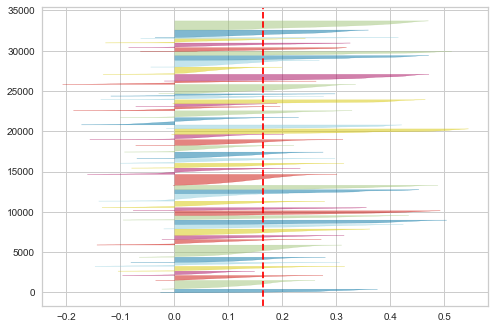

In [83]:
km = KMeans(n_clusters=50, init='k-means++', n_init=10, max_iter=100, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=80,
                                      random_state=42))

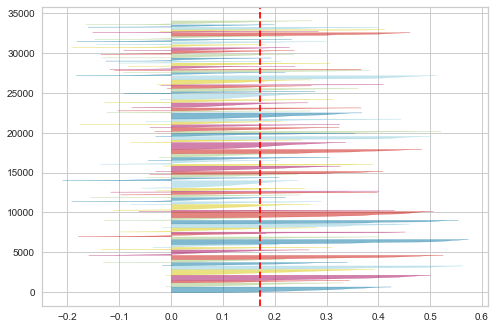

In [81]:
km = KMeans(n_clusters=80, init='k-means++', n_init=10, max_iter=500, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=180,
                                      random_state=42))

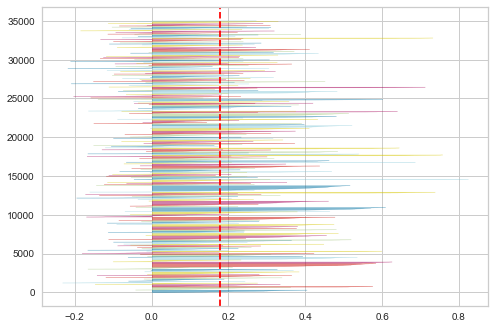

In [82]:
km = KMeans(n_clusters=180, init='k-means++', n_init=10, max_iter=500, random_state=42)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

### Running kmeans with more iterations

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=2))

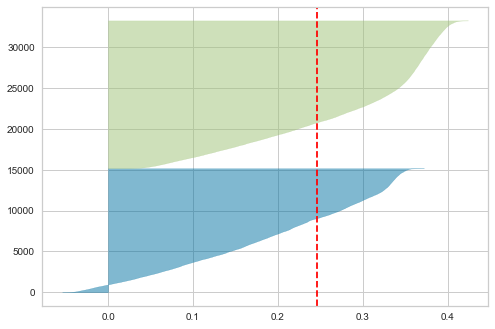

In [8]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=500)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(data_transformed)

In [ ]:
### Running KMeans with Pricipal component data

SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=2))

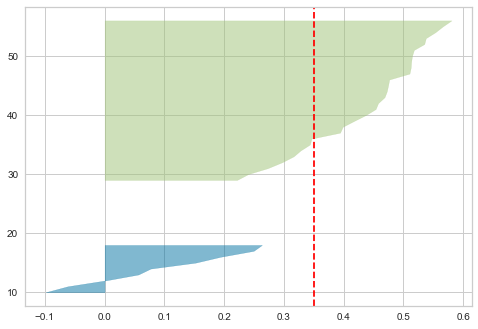

In [23]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=500)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

In [40]:
pc_dat

,1,2,3,4,5,6,7,8,9,10,...,71,72,73,74,75,76,77,78,79,80
0,0.416900,0.109633,0.423582,0.448586,0.475971,0.434215,0.411061,0.427590,0.444588,0.429287,...,-4.113424e-12,-2.226085e-12,-3.496241e-12,-5.912148e-12,-8.720251e-12,-2.525294e-12,-2.040993e-12,-1.413798e-12,-2.781382e-13,-3.164894e-24
1,0.416897,0.109633,0.423586,0.448583,0.475969,0.434212,0.411057,0.427588,0.444550,0.429283,...,-2.313701e-12,-2.582574e-12,-2.408985e-12,-3.883525e-12,-5.151138e-12,-2.877878e-12,-2.485627e-12,-1.886789e-12,-4.818453e-13,-1.526519e-22
2,0.416897,0.109633,0.423585,0.448584,0.475969,0.434211,0.411059,0.427588,0.444525,0.429286,...,-1.454486e-12,-1.515676e-12,-1.819143e-12,-2.811864e-12,-3.492199e-12,-1.876096e-12,-1.551077e-12,-1.181361e-12,-4.445564e-13,6.666935e-23
3,0.416897,0.109633,0.423562,0.448582,0.475969,0.434210,0.411057,0.427582,0.444562,0.429281,...,4.666654e-12,2.717572e-12,3.435027e-12,5.555283e-12,7.705043e-12,8.898551e-13,3.618165e-13,-1.757656e-13,-2.991432e-13,4.593217e-23
4,0.416896,0.109633,0.423587,0.448582,0.475969,0.434210,0.411058,0.427586,0.444533,0.429283,...,3.292772e-12,2.644844e-12,2.181178e-12,3.883201e-12,4.633346e-12,1.971925e-12,1.783459e-12,1.351168e-12,1.375693e-13,2.692136e-22
5,0.416893,0.109633,0.423617,0.448579,0.475966,0.434211,0.411056,0.427583,0.444583,0.429280,...,-2.595486e-12,1.039742e-12,-1.751058e-12,-2.531207e-12,-3.433661e-12,1.094638e-12,1.306422e-12,1.417409e-12,7.648321e-13,2.130088e-22
6,0.416898,0.109633,0.423632,0.448583,0.475968,0.434214,0.411058,0.427590,0.444535,0.429283,...,-4.457306e-12,-7.232671e-13,-2.748466e-12,-5.011415e-12,-7.521993e-12,-1.312636e-12,-1.047358e-12,-8.376107e-13,-1.142538e-13,9.043977e-23
7,0.416892,0.109633,0.423564,0.448577,0.475967,0.434208,0.411055,0.427587,0.444574,0.429280,...,-4.239983e-12,-2.124257e-12,-2.811218e-12,-5.304098e-12,-6.436089e-12,-2.749145e-12,-2.425748e-12,-2.037340e-12,-6.437553e-13,4.365530e-23
8,0.416897,0.109633,0.423631,0.448583,0.475968,0.434214,0.411059,0.427586,0.444460,0.429286,...,2.770528e-12,2.946885e-12,3.832358e-12,6.032855e-12,7.832762e-12,3.122054e-12,2.558264e-12,1.509377e-12,4.369806e-13,8.658126e-23
9,0.416895,0.109633,0.423585,0.448578,0.475966,0.434205,0.411057,0.427589,0.444482,0.429279,...,-3.809727e-14,1.482703e-12,2.066357e-12,2.581535e-12,2.644123e-13,1.682230e-12,1.159644e-12,5.513641e-13,-3.426792e-14,-7.276103e-23


SilhouetteVisualizer(ax=<AxesSubplot:>, colors='yellowbrick',
                     estimator=KMeans(max_iter=500, n_clusters=12))

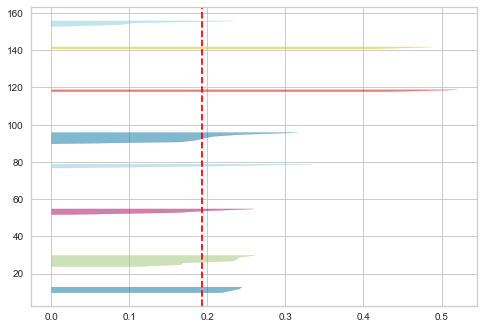

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer


'''
Create KMeans instance for different number of clusters
'''
km = KMeans(n_clusters=12, init='k-means++', n_init=10, max_iter=500)
#q, mod = divmod(i, 5)
'''
Create SilhouetteVisualizer instance with KMeans instance
Fit the visualizer
'''
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(pc_dat)

In [76]:
def compute_inertia(a, X):
    W = [np.mean(pairwise_distances(X[a == c, :])) for c in np.unique(a)]
    return np.mean(W)

def compute_gap(clustering, data, k_max=5, n_references=5):
    if len(data.shape) == 1:
        data = data.reshape(-1, 1)
    reference = np.random.rand(*data.shape)
    reference_inertia = []
    for k in range(1, k_max+1):
        local_inertia = []
        for _ in range(n_references):
            clustering.n_clusters = k
            assignments = clustering.fit_predict(reference)
            local_inertia.append(compute_inertia(assignments, reference))
        reference_inertia.append(np.mean(local_inertia))
    
    ondata_inertia = []
    for k in range(1, k_max+1):
        clustering.n_clusters = k
        assignments = clustering.fit_predict(data)
        ondata_inertia.append(compute_inertia(assignments, data))
        
    gap = np.log(reference_inertia)-np.log(ondata_inertia)
    return gap, np.log(reference_inertia), np.log(ondata_inertia)

In [ ]:
gap, reference_inertia, ondata_inertia = compute_gap(KMeans(), data_transformed, k_max=5)

In [3]:
feats = pd.read_csv('../tsfresh_feats.csv')

In [10]:
raw = pd.read_csv('dataframe_for_tsfresh.csv')

In [17]:
raw_process = raw[['id', 'Y']]

In [18]:
extr = extract_features(raw_process, column_id='id')

Feature Extraction: 100%|██████████████████████████████████████████████████████████████| 30/30 [06:54<00:00, 13.82s/it]


In [19]:
extr.to_csv('tsfeats_extracted_py.csv')

In [7]:
ts.head()

,id,Y,date
0,1,9633198.92,2016-01-01
1,1,4267962.53,2016-02-01
2,1,937756.38,2016-03-01
3,1,-6745044.24,2016-04-01
4,1,-6689396.17,2016-05-01


In [13]:
tbl = calculate_relevance_table(X=feats, y=ts)

AssertionError: The index of X and y need to be the same

In [19]:
tslst = []

for i in 
ts[ts.id == 1].Y

0      9633198.92
1      4267962.53
2       937756.38
3     -6745044.24
4     -6689396.17
         ...     
57    -9684545.46
58    -7962831.99
59   -31288082.11
60     9026404.23
61     3632378.80
Name: Y, Length: 62, dtype: float64

In [15]:
feats.index

RangeIndex(start=0, stop=76604, step=1)

### Checking out affinity propagation
Disadvantage: Quadratic Runtime

2000 = 9.1 s
4000 = 98 s
8000 = 10000 s ...

In [33]:
from sklearn.cluster import AffinityPropagation
import numpy as np
import timeit

In [89]:
subsamp = ts_normed.sample(4000)
test = subsamp.sample(1000)
train = subsamp.drop(test.index, axis = 0)

In [90]:
# CLS for all

start = timeit.default_timer()

clustering_truth = AffinityPropagation(random_state=5, preference = -65).fit(subsamp)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  30.30706320000172


In [91]:
# CLS for training set

start = timeit.default_timer()

clustering_model = AffinityPropagation(random_state=5, preference = -65).fit(train)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  16.4418760999979


In [137]:
len(set(clustering_model.labels_))

36

In [96]:
# Predict test set with trained CLS


pr = clustering_model.predict(ts_normed)

In [216]:
# pca for subsample
pca_sub = PCA(.90)
pca_sub.fit(subsamp)
pc_dat_sub = pca.transform(train)
pc_df_sample = pd.DataFrame(pc_dat_sub)

In [217]:
pc_df_sample['cl'] = clustering_model.labels_

In [122]:
# PCA for all

pca = PCA(.90)
pca.fit(ts_normed)
pc_dat = pca.transform(ts_normed)
pc_df = pd.DataFrame(pc_dat)

In [108]:
pc_df['cl'] = pc


In [131]:
pca.explained_variance_ratio_

array([0.32742219, 0.11687933, 0.08334573, 0.06238163, 0.04282136,
       0.03359032, 0.0313754 , 0.02239436, 0.01830789, 0.01646975,
       0.01480901, 0.01361035, 0.0124897 , 0.01223737, 0.01184495,
       0.01031955, 0.00995741, 0.00898755, 0.00866421, 0.00844841,
       0.00730678, 0.00658401, 0.00629671, 0.00610185, 0.00580204,
       0.00558335])

In [130]:
pca.components_

array([[ 3.92923533e-04,  8.01433842e-04,  6.33978539e-05, ...,
         6.13119201e-05, -8.01071024e-06, -5.53742506e-03],
       [ 2.88058959e-04, -7.79686145e-05,  5.27038918e-05, ...,
        -1.68661641e-04, -1.90430416e-04, -2.98364262e-03],
       [ 2.02734421e-04, -9.93884666e-05, -3.65889417e-05, ...,
        -2.46988878e-04,  7.38155254e-05, -3.68673852e-03],
       ...,
       [-6.77568845e-04, -1.05270904e-03, -1.19365189e-04, ...,
        -2.30074643e-04,  1.25397179e-03, -1.80965389e-02],
       [ 6.55795664e-04,  2.83427975e-03,  3.42253587e-04, ...,
        -7.51524127e-06,  5.03284792e-04,  1.34787541e-03],
       [ 2.37853451e-04,  2.06059427e-03,  7.76347755e-05, ...,
         2.93258037e-05,  5.97349411e-05, -2.06004631e-02]])

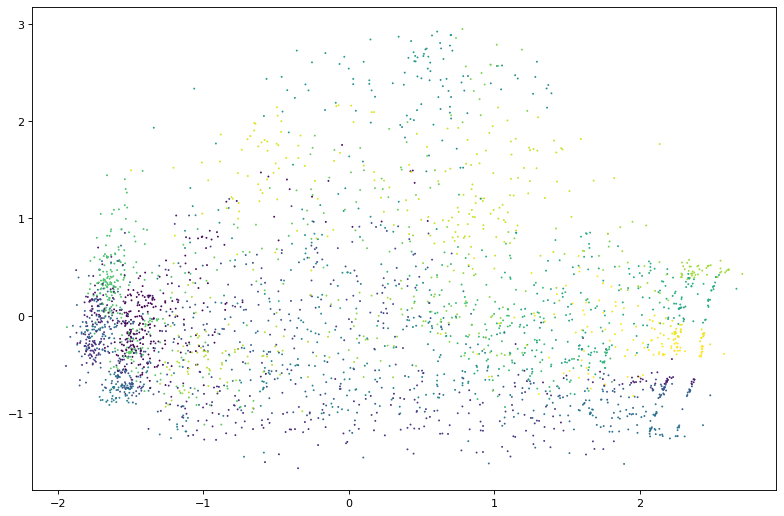

In [221]:

figure(figsize=(12, 8), dpi=80)
plt.scatter(pc_df_sample.loc[:,0], pc_df_sample.loc[:,1], c=pc_df_sample.cl, s = 0.5)

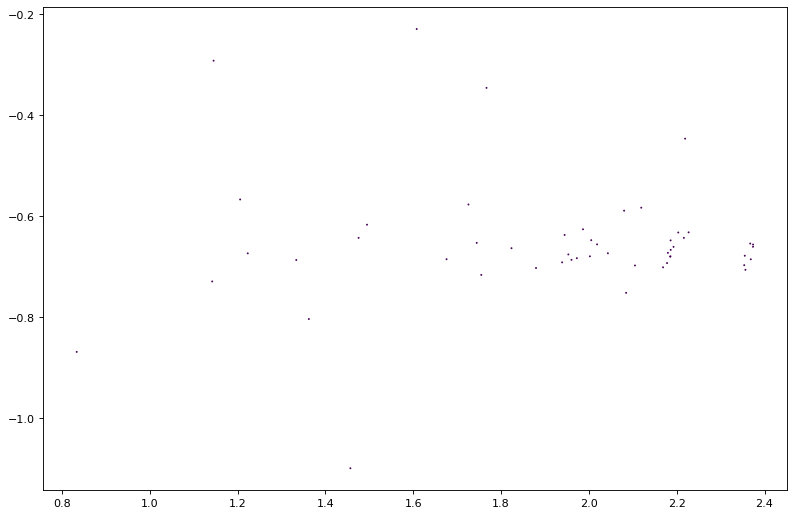

In [223]:
pc_df_sample_sub = pc_df_sample[pc_df_sample.cl == 3]


figure(figsize=(12, 8), dpi=80)
plt.scatter(pc_df_sample_sub.loc[:,0], pc_df_sample_sub.loc[:,1], c=pc_df_sample_sub.cl, s = 0.5)

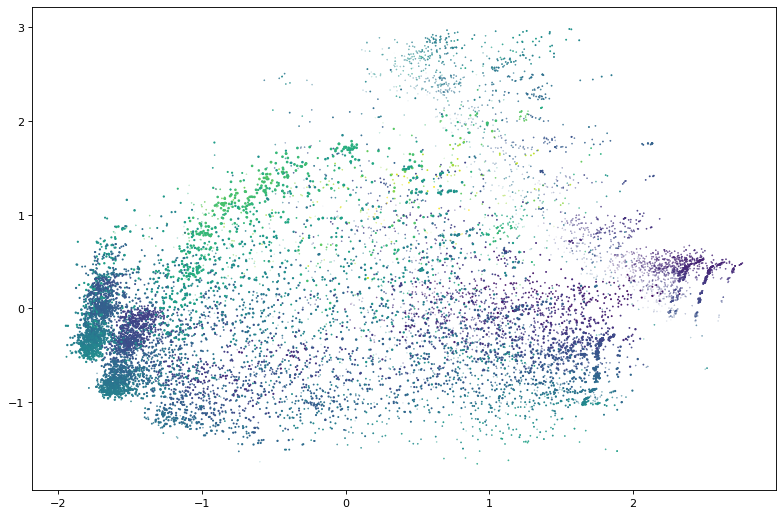

In [145]:
from matplotlib.pyplot import figure

figure(figsize=(12, 8), dpi=80)

plt.scatter(pc_df.loc[:,0], pc_df.loc[:,1], c=pc_df.loc[:,2], s=pc_df.loc[:,3])

In [164]:
pc_df['cluster'] = pr

In [ ]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.scatter(pc_df.loc[:,0], pc_df.loc[:,1], c=pc_df['cluster'], s = 0.3)
fig.colorbar(im, ax = ax)

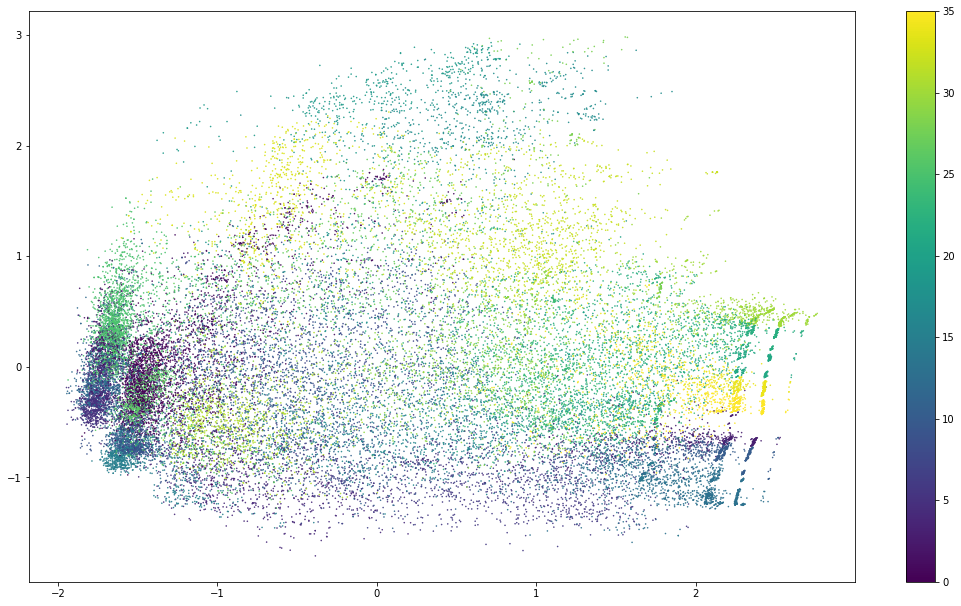

In [203]:
from matplotlib.pyplot import figure

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.scatter(pc_df.loc[:,0], pc_df.loc[:,1], c=pc_df['cluster'], s = 0.3)
fig.colorbar(im, ax = ax)

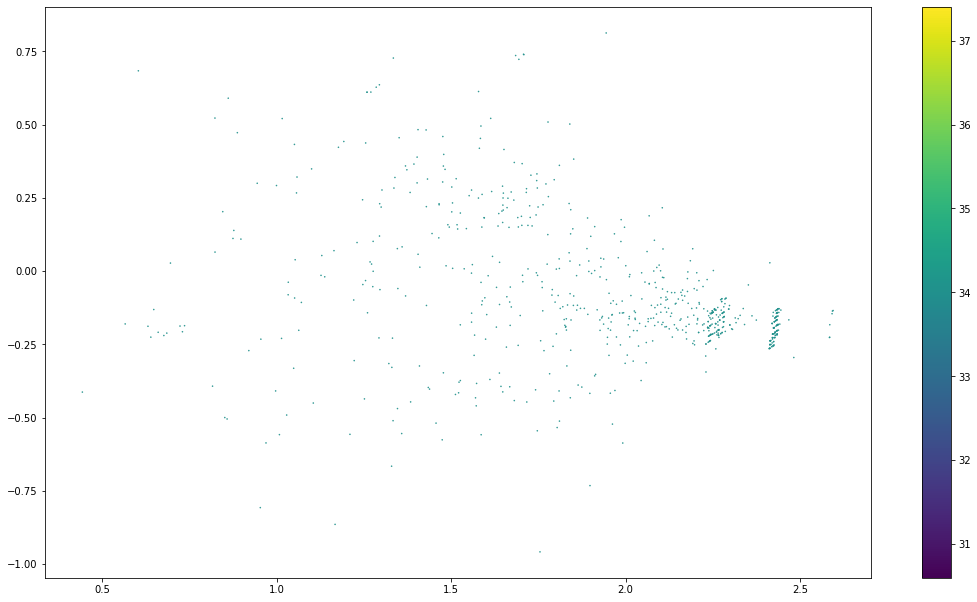

In [200]:
from matplotlib.pyplot import figure


pc_df_sub = pc_df[pc_df.cluster == 34]

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)
im = ax.scatter(pc_df_sub.loc[:,0], pc_df_sub.loc[:,1], c=pc_df_sub['cluster'], s = 0.3)
fig.colorbar(im, ax = ax)

(array([2135.,  583.,  749.,  656.,  882., 1170.,  877.,  753., 1031.,
        1013.,  782., 1046., 1370., 1195.,  374., 1138., 1416.,  662.,
         487.,  475.,  718.,  601.,  827.,  615., 1048., 1842., 1274.,
         773.,  218., 1040.,  929., 1117., 1216.,  756., 1497.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35], dtype=int64),
 <BarContainer object of 35 artists>)

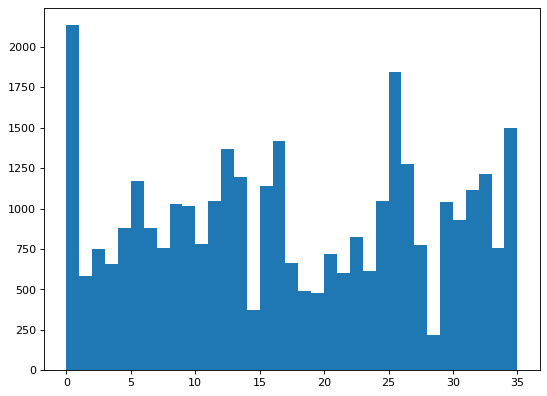

In [163]:

figure(figsize=(8, 6), dpi=80)
plt.hist(pr, bins=np.arange(pr.min(), pr.max()+1))


In [57]:

subsamp = ts_normed.sample(3000)
start = timeit.default_timer()

clustering4_nopref = AffinityPropagation(random_state=5).fit(subsamp)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  11.537669299999834


In [40]:

subsamp = ts_normed.sample(2000)
start = timeit.default_timer()

clustering2 = AffinityPropagation(random_state=5).fit(subsamp)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  4.021684199997253


In [41]:

subsamp = ts_normed.sample(1000)
start = timeit.default_timer()

clustering1 = AffinityPropagation(random_state=5).fit(subsamp)

stop = timeit.default_timer()

print('Time: ', stop - start)  

Time:  2.0101317999979074


In [32]:
len(clustering.labels_)

1000

In [67]:
clustering4_nopref.cluster_centers_

array([[1.44241546e-01, 4.17197388e-01, 1.09633299e-01, ...,
        0.00000000e+00, 5.71591817e-42, 0.00000000e+00],
       [1.44432846e-01, 4.17333835e-01, 1.09633303e-01, ...,
        0.00000000e+00, 4.76388139e-15, 1.00000000e+00],
       [1.43974061e-01, 4.18093754e-01, 1.10226862e-01, ...,
        0.00000000e+00, 5.16595200e-13, 1.00000000e+00],
       ...,
       [1.44416763e-01, 4.16912406e-01, 1.09633304e-01, ...,
        0.00000000e+00, 2.70921749e-10, 1.00000000e+00],
       [1.44111157e-01, 4.17707488e-01, 1.09668849e-01, ...,
        0.00000000e+00, 6.39071389e-11, 1.00000000e+00],
       [1.44243368e-01, 4.17914302e-01, 1.09633299e-01, ...,
        0.00000000e+00, 2.56337215e-12, 1.00000000e+00]])

In [70]:
len(clustering4.cluster_centers_)

38

In [72]:
ts_normed.loc[1,:]

ARCH.LM                                       0.144398
arch_acf                                      0.416999
arch_r2                                       0.109696
crossing_points                               0.478782
diff1_acf1                                    0.448700
                                                ...   
Y__value_count__value_.1                      0.000000
Y__value_count__value_0                       0.000000
Y__value_count__value_1                       0.000000
Y__variance                                   0.000078
Y__variance_larger_than_standard_deviation    1.000000
Name: 1, Length: 268, dtype: float64

In [75]:
clustering4.predict(ts_normed.sample(4))

array([12,  0, 18,  6], dtype=int64)

In [68]:
clustering4_nopref.affinity_matrix_.min()

-63.883597019199314